# Generation of binary images containing different type and size of shapes

This notebook generates binary images for the Counting simple shapes (circles, sqaures or diamonds) experiemnt. (Code from https://github.com/rpmcruz/cnn-count has been used as a starting point nd modified accordingly).

### Settings

In [13]:
# Imports
from CNNcount import generate_shape_images as gen
from skimage.morphology import disk, diamond, square
import numpy as np
import matplotlib.pyplot as plt
from numpy import savez, load
import os.path

In [14]:
# define constants
NIM = 60000
NIMDISPL = 12
NMIN, NMAX = 1, 3  # nbr of shapes
RMIN, RMAX = 2, 6  # shape radius
IMGSIZE = 64
OCCL = 0

SHAPES = [disk, diamond, square] 

In [20]:
# filenames for saving the data as NPZ files (NumPy compressed)
same_shape_same_radius_fname = "../Data/CountingShapes/circles_same_radius_60k.npz"
same_shape_diff_radii_fname = "../Data/CountingShapes/diamonds_diff_radii_60k.npz"
diff_shapes_same_radius_fname = "../Data/CountingShapes/diff_shapes_same_radius_60k.npz"
diff_shapes_diff_radii_fname = "../Data/CountingShapes/diff_shapes_diff_radii_60k.npz"

## Generation of binary images with up to 3 of the same shape (circle) and same radius

In [16]:
# generate large training set of NIM images with the same type and same radius
if os.path.isfile(same_shape_same_radius_fname): # already generated- just load
    print ("The file containing images of the same shape (circle) with same radius already exist!")
    # load from NPZ file for display
    data = load(same_shape_same_radius_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data
    shape_type_ind = 0 # circles
    shape_radius = int((RMIN+RMAX)/2)
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1))
        shapes = [(shape_type_ind, shape_radius) for _ in range(n)]
        img = gen.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of the same shape (circle) with same radius have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(same_shape_same_radius_fname,images=X,labels=Y)
    images = X
    labels = Y

The file containing images of the same shape (circle) with same radius already exist!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)


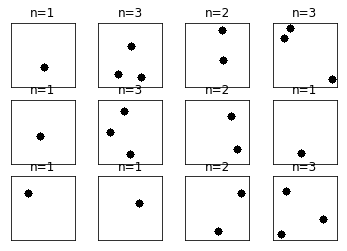

In [17]:
# plot random 12 of the generated NIM images
j=0
for _ in range(NIMDISPL):
    ind=int(np.random.randint(1,NIM))
    img=images[ind,:,:]
    img=np.reshape(img,(64,64))
    label=labels[ind]
    j = j+1
    plt.subplot(3, 4, j)
    plt.imshow(img,cmap='binary')
    plt.xticks([])
    plt.yticks([])
   # plt.title('#%d' %(ind))
    plt.title('n=%d' %(label))
   

plt.show()

## Generation of binary images with up to 3 of the same shape (diamond) with different radii

In [18]:
# generate NIMD test images with the same shape and different radii
if os.path.isfile(same_shape_diff_radii_fname): # already generated- just load
    print ("The file containing images of the same shape (diamonds) with different radii already exist!")
    # load from NPZ file for display
    data = load(same_shape_diff_radii_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data
    shape_type_ind = 1 # diamonds
    shape_radius = int((RMIN+RMAX)/2)
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1))
        shapes = [(shape_type_ind, np.random.randint(RMIN, RMAX)) for _ in range(n)]
        img = gen.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of the same shape (diamonds) with different radii have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(same_shape_diff_radii_fname,images=X,labels=Y)
    images = X
    labels = Y


The file containing images of the same shape (diamonds) with different radii already exist!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)


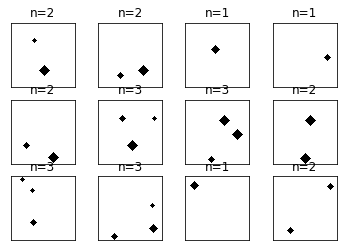

In [19]:
# plot random 12 of the generated NIM images
j=0
for _ in range(NIMDISPL):
    ind=int(np.random.randint(1,NIM))
    img=images[ind,:,:]
    img=np.reshape(img,(64,64))
    label=labels[ind]
    j = j+1
    plt.subplot(3, 4, j)
    plt.imshow(img,cmap='binary')
    plt.xticks([])
    plt.yticks([])
   # plt.title('#%d' %(ind))
    plt.title('n=%d' %(label))
   

plt.show()

## Generation of binary images with up to 3 different shapes (circle, diamond, square) with the same radius

In [22]:
# generate NIM test images with random type shapes and same radius

if os.path.isfile(diff_shapes_same_radius_fname): # already generated- just load
    print ("The file containing images of the different shapes (circle, diamond, square) with same radius already exist!")
    # load from NPZ file for display
    data = load(same_shape_same_radius_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data
    
    shape_radius = int((RMIN+RMAX)/2)
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1))        
        shapes = [(np.random.randint(len(SHAPES)), shape_radius) for _ in range(n)]
        img = gen.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of the same shape (circle) with same radius have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(diff_shapes_same_radius_fname,images=X,labels=Y)
    images = X
    labels = Y

Generating data...
The images of the same shape (circle) with same radius have been generated!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)
Saving data...


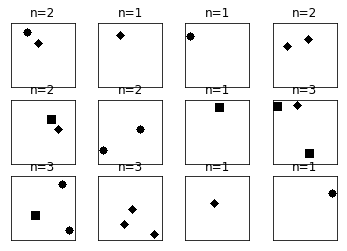

In [23]:
# plot random 12 of the generated NIM images
j=0
for _ in range(NIMDISPL):
    ind=int(np.random.randint(1,NIM))
    img=images[ind,:,:]
    img=np.reshape(img,(64,64))
    label=labels[ind]
    j = j+1
    plt.subplot(3, 4, j)
    plt.imshow(img,cmap='binary')
    plt.xticks([])
    plt.yticks([])
   # plt.title('#%d' %(ind))
    plt.title('n=%d' %(label))
   

plt.show()

## Generation of binary images with up to 3 different shapes (circle, diamond, square) with different radii

In [24]:
# generate NIMD test images with random type shapes and random radius
if os.path.isfile(diff_shapes_diff_radii_fname): # already generated- just load
    print ("The file containing images of the different shapes (circle, diamond, square) with different radii already exist!")
    # load from NPZ file for display
    data = load(same_shape_same_radius_fname)
    images=data['images']
    labels=data['labels']
    print("Size of data: ", np.shape(images))
    print("Size of labels: ", np.shape(labels))
else:
    print ("Generating data...") # generate data
    
    shape_radius = int((RMIN+RMAX)/2)
    X = np.zeros(shape=(NIM,IMGSIZE,IMGSIZE,1), dtype = np.float32)
    Y = np.zeros(shape=(NIM), dtype = np.uint8)
    for i in range(NIM):
        n = int(np.random.randint(NMIN, NMAX+1))        
        shapes = [(np.random.randint(len(SHAPES)), np.random.randint(RMIN, RMAX)) for _ in range(n)]
        img = gen.generate_image(IMGSIZE, shapes, OCCL)
        X[i,:,:,:] = img[np.newaxis, :, :, np.newaxis].astype(np.float32)
        Y[i]=n
    print("The images of the same shape (circle) with different radii have been generated!");
    print("Size of data: ", np.shape(X))
    print("Size of labels: ", np.shape(Y))
    print ("Saving data...")
    # save the generated data as NPZ file
    savez(diff_shapes_diff_radii_fname,images=X,labels=Y)
    images = X
    labels = Y        


Generating data...
The images of the same shape (circle) with different radii have been generated!
Size of data:  (60000, 64, 64, 1)
Size of labels:  (60000,)
Saving data...


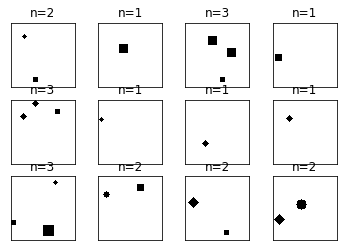

In [25]:
# plot random 12 of the generated NIM images
j=0
for _ in range(NIMDISPL):
    ind=int(np.random.randint(1,NIM))
    img=images[ind,:,:]
    img=np.reshape(img,(64,64))
    label=labels[ind]
    j = j+1
    plt.subplot(3, 4, j)
    plt.imshow(img,cmap='binary')
    plt.xticks([])
    plt.yticks([])
   # plt.title('#%d' %(ind))
    plt.title('n=%d' %(label))
   

plt.show()